## 인구 현황 시각화

인구 현황을 지도, 카르토그램 시각화

### 데이터 읽기 및 확인

In [1]:
import pandas as pd
import numpy as np

In [2]:
pop = pd.read_excel('D://data/population_02.xlsx')
pop

,Unnamed: 0,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,0,강원도,강릉시,26286,23098.0,49384.0,15767.0,21912,37679.0,106231.0,107615,213846.0,1.226041,False
1,1,강원도,고성군,4494,2529.0,7023.0,2900.0,4251,7151.0,15899.0,14215,30114.0,0.707314,True
2,2,강원도,동해시,11511,9753.0,21264.0,6392.0,8732,15124.0,47166.0,46131,93297.0,1.289738,False
3,3,강원도,삼척시,8708,7115.0,15823.0,5892.0,8718,14610.0,35253.0,34346,69599.0,0.973990,True
4,4,강원도,속초시,9956,8752.0,18708.0,5139.0,7613,12752.0,40288.0,41505,81793.0,1.372647,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,충청북도,진천군,9391,7622.0,17013.0,4731.0,6575,11306.0,36387.0,33563,69950.0,1.348311,False
260,260,충청북도,청원구,32216,27805.0,60021.0,8417.0,11914,20331.0,97006.0,93807,190813.0,2.735232,False
261,261,충청북도,청주시,128318,115719.0,244037.0,37882.0,53671,91553.0,419323.0,415874,835197.0,2.527913,False
262,262,충청북도,충주시,26600,22757.0,49357.0,14407.0,20383,34790.0,104877.0,103473,208350.0,1.308249,False


In [3]:
del pop['Unnamed: 0']
pop

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286,23098.0,49384.0,15767.0,21912,37679.0,106231.0,107615,213846.0,1.226041,False
1,강원도,고성군,4494,2529.0,7023.0,2900.0,4251,7151.0,15899.0,14215,30114.0,0.707314,True
2,강원도,동해시,11511,9753.0,21264.0,6392.0,8732,15124.0,47166.0,46131,93297.0,1.289738,False
3,강원도,삼척시,8708,7115.0,15823.0,5892.0,8718,14610.0,35253.0,34346,69599.0,0.973990,True
4,강원도,속초시,9956,8752.0,18708.0,5139.0,7613,12752.0,40288.0,41505,81793.0,1.372647,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,9391,7622.0,17013.0,4731.0,6575,11306.0,36387.0,33563,69950.0,1.348311,False
260,충청북도,청원구,32216,27805.0,60021.0,8417.0,11914,20331.0,97006.0,93807,190813.0,2.735232,False
261,충청북도,청주시,128318,115719.0,244037.0,37882.0,53671,91553.0,419323.0,415874,835197.0,2.527913,False
262,충청북도,충주시,26600,22757.0,49357.0,14407.0,20383,34790.0,104877.0,103473,208350.0,1.308249,False


In [4]:
pop['20-39세남자'] = pop['20-39세남자'].astype('float')
pop['인구수여자'] = pop['인구수여자'].astype('float')

In [5]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세 이상남자  264 non-null    float64
 6   65세 이상여자  264 non-null    int64  
 7   65세 이상합계  264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 25.1+ KB


In [6]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

### 지도 ID 생성

#### 구 이름이 겹치는 상황이 있으니 시:구 형태로 재생성

In [7]:
si_name = [None] * len(pop)

tmp_gu_dict = {
    '수원':['장안구','권선구','팔달구','영통구'],
    '성남':['수정구','중원구','분당구'],
    '안양':['만안구','동안구'],
    '안산':['상록구','단원구'],
    '고양':['덕양구','일산동구','일산서구'],
    '용인':['처인구','기흥구','수지구'],
    '청주':['상당구','서원구','흥덕구','청원구'],
    '천안':['동남구','서북구'],
    '전주':['완산구','덕진구'],
    '포항':['남구','북구'],
    '창원':['의창구','성산구','진해구','마산합포구','마산회원구'],
    '부천':['오정구','원미구','소사구']
}

In [8]:
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [9]:
pop['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

#### 일반 시의 이름과 세종시, 그리고 광역시도의 일반 구 정리

강릉시 > 강릉  
춘천시 > 춘천  

이런식으로

In [10]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시', '특별시','자치시']:
        si_name[idx] = row['시도'][:-1]
    elif row['광역시도'] == '세종특별자치시':
        si_name[idx] = '세종'
    else:
        if len(row['시도']) == 2:
            si_name[idx] = row['광역시도'][:2] + ' ' + row['시도']
        else:
            si_name[idx] = row['광역시도'][:2] + ' ' + row['시도'][:-1]

In [11]:
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613,12752.0,40288.0,41505.0,81793.0,1.372647,False


#### 행정구 다시 계산

In [12]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        for keys, values in tmp_gu_dict.items():
            if row['시도'] in values:
                if len(row['시도']) == 2:
                    si_name[idx] = keys + ' ' + row['시도']
                elif row['시도'] in ['마산합포구', '마산회원구']:
                    si_name[idx] = keys + ' ' + row['시도'][2:-1]
                else:
                    si_name[idx] = keys + ' ' + row['시도'][:-1]
                    
                    

#### 고성이 강원도랑 경상남도에 둘 다 있어서 다시 계산

In [13]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시','특별시','자치시']:
        if row['시도'][:-1] == '고성' and row['광역시도'] == '강원도':
            si_name[idx] = '고성(강원)'
        elif row['시도'][:-1] == '고성' and row['광역시도'] == '경상남도':
            si_name[idx] = '고성(경남)'


In [14]:
pop['ID'] = si_name

In [15]:
del pop['20-39세남자']
del pop['65세 이상남자']
del pop['65세 이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


### 지도 카르토그램

In [16]:
draw_korea_raw = pd.read_excel('D://data/07_draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [17]:
draw_korea_raw.stack()

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 252, dtype: object

In [18]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [19]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [20]:
draw_korea_raw_stacked.rename(
    columns={
        'level_0':'y',
        'level_1':'x',
        0:'ID'
    }, inplace=True
)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [21]:
draw_korea = draw_korea_raw_stacked

In [22]:
# 엑셀에 라인 그리기
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3),(19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전, 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주시
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]  
]

In [23]:
draw_korea['ID'][13].split()[1]

'일산동'

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [25]:
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
    
        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight = 'bold',
            fontsize = fontsize,
            linespacing = linespacing,
            ha = 'center', # 수평정렬
            va = 'center'  # 수직정렬
        )

In [26]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8, 11))
    
    plot_text_simple(draw_korea)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

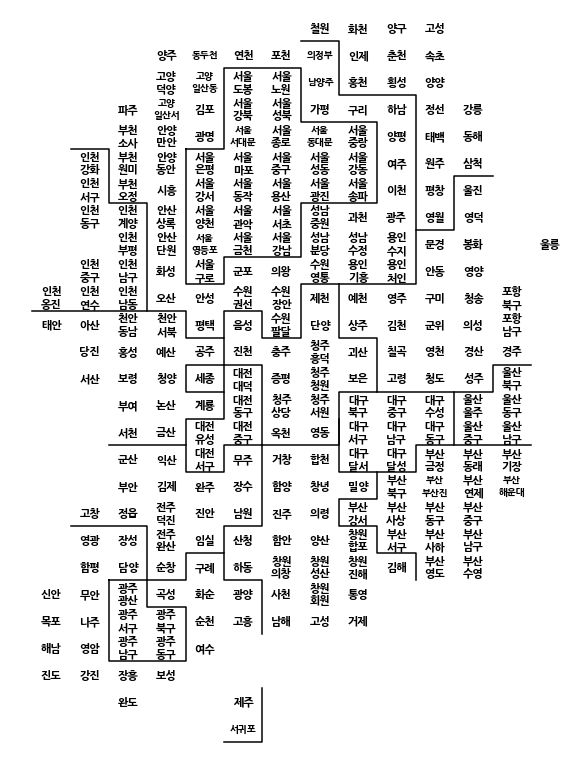

In [27]:
simpleDraw(draw_korea)

### 데이터 검증 작업

#### 데이터 차집합 확인

In [28]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

In [29]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())


{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

#### 차집합 데이터 정리

In [30]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index)
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


#### 데이터 merge

In [31]:
pop = pd.merge(pop, draw_korea, how='left', on='ID')
pop

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,충청북도,증평군,4554.0,10085.0,5323.0,19110.0,18198.0,37308.0,1.711065,False,증평,13,6
248,충청북도,진천군,7622.0,17013.0,11306.0,36387.0,33563.0,69950.0,1.348311,False,진천,12,5
249,충청북도,청원구,27805.0,60021.0,20331.0,97006.0,93807.0,190813.0,2.735232,False,청주 청원,13,7
250,충청북도,충주시,22757.0,49357.0,34790.0,104877.0,103473.0,208350.0,1.308249,False,충주,12,6


### 그림을 그리기 위한 데이터 계산 함수

- 색상 만들 때, 최소값 흰색  

- blockedMap: 인구 현황(pop)  

- targetData: 그리고 싶은 칼럼

In [38]:
def get_data_info(targetData, blockedMap):
    whitelabelmin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

In [39]:
def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )
    vmin, vmax = -tmp_max, tmp_max
    mapData = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    return mapData, vmax, vmin, whitelabelmin

In [40]:
def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        
        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight = 'bold',
            fontsize = fontsize,
            linespacing = linespacing,
            ha = 'center', # 수평정렬
            va = 'center'  # 수직정렬
        )

In [41]:
def drawKorea(targetData, blockedMap, cmapname, zeroCenter=False):
    
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData, blockedMap)
    
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
        
    
    plt.figure(figsize=(8, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    plot_text(targetData, blockedMap, whitelabelmin)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout()
    cb = plt.colorbar(shrink = 0.1, aspect=10)
    cb.set_label(targetData)
    plt.show()

In [42]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


#### 인구밀도 시각화

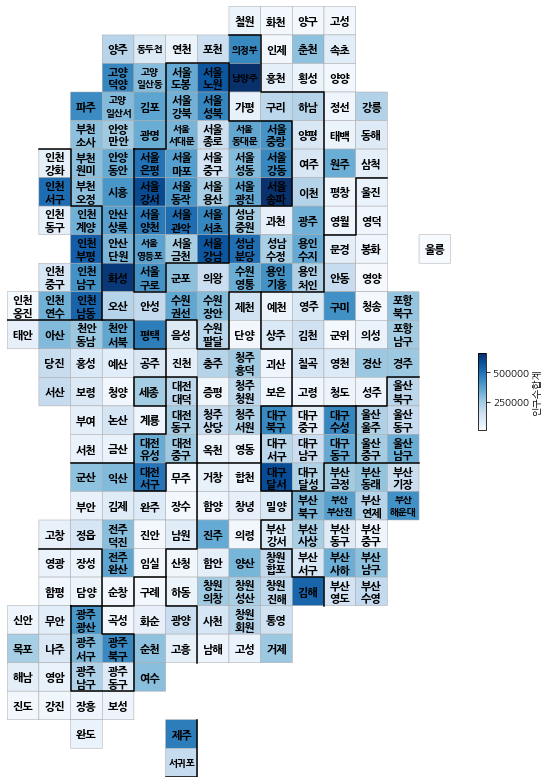

In [44]:
drawKorea('인구수합계', pop, 'Blues')

#### 지도에 소멸위기지역 시각화

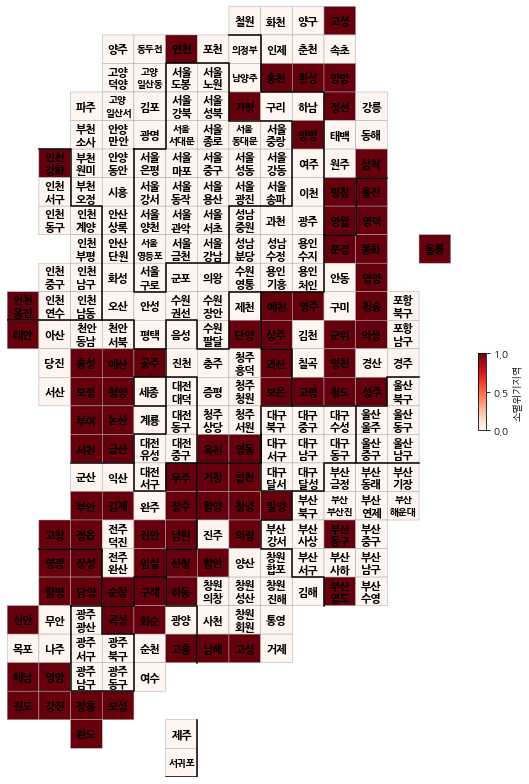

In [45]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

#### 여성비 기준 시각화

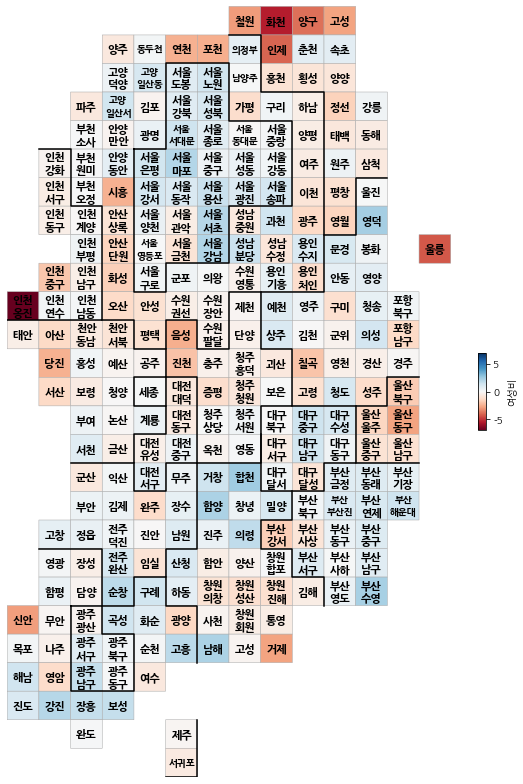

In [46]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수합계'] - 0.5) * 100
drawKorea('여성비', pop, 'RdBu', zeroCenter=True)

#### 2030 여성비 시각화

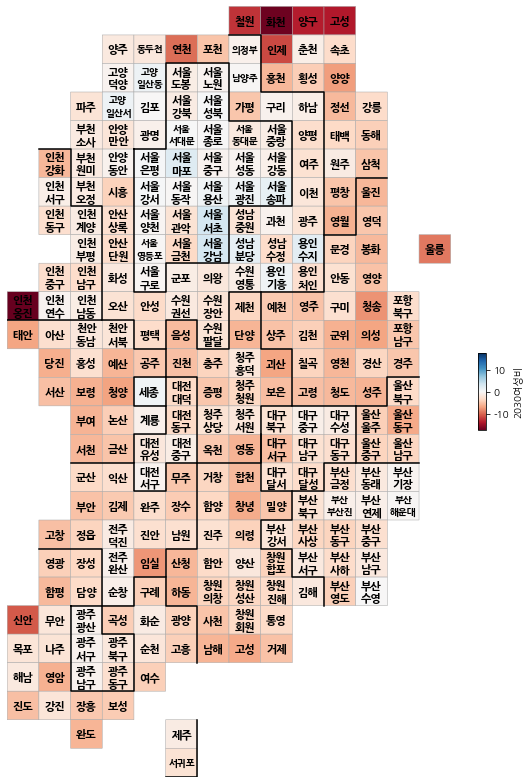

In [47]:
pop['2030여성비'] = (pop['20-39세여자']  / pop['20-39세합계'] - 0.5) * 100
drawKorea('2030여성비', pop, 'RdBu', zeroCenter=True)

#### 실제 지도에 시각화

In [49]:
import folium
import json

pop_folium = pop.set_index('ID')
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,강릉,3,11,0.323597,-3.227766
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,고성(강원),0,10,-2.796042,-13.989748
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,동해,4,11,-0.554680,-4.133747
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,삼척,5,11,-0.651590,-5.033812
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,속초,1,10,0.743951,-3.217875


In [55]:
geo_path = 'D:/data/07_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

mymap = folium.Map(location=[36.2002, 127.054], zoom_start=7)
mymap

#### 인구밀도 지도에 시각화

In [56]:
mymap.choropleth(
    geo_data = geo_str,
    data = pop_folium['인구수합계'],
    key_on = 'feature.id',
    columns=[pop_folium.index, pop_folium['인구수합계']],
    fill_color = 'YlGnBu'
)
mymap

c:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 소멸위기지역 지도에 시각화

In [57]:
mymap.choropleth(
    geo_data = geo_str,
    data = pop_folium['소멸위기지역'],
    key_on = 'feature.id',
    columns=[pop_folium.index, pop_folium['소멸위기지역']],
    fill_color = 'PuRd'
)
mymap